# Model Prediction Results Evaluation


In this notebook predictions are compared with each other.
Pickled Dataframe was retrieved from Googles' Colab service, where file [Models.ipynb](Models.ipynb) was executed. The resulting Dataframe consists of true labels, their fold and filename + prediction results for each dataset augmentation technique. Size of this dataset is double of original, as we are storing results for both original recordings and their augmented version. Each column in ['dist', 'mixup', 'imixup', 'room', 'warp', 'delay', 'spectrum', 'all'] is effectively storing model prediction results for 10 different runs, as dataset is split in 10 folds.

To achieve consistent and reliable verdict, metrics should be averaged over folds, (hopefully) excluding randomness in the training process.


As the data in question implies a typical categorization task, typical metrics for this problem are known. In other domains one most commonly see accuracy, precision, recall and f1 metrics. One relevant paper also uses a metric usually found in recomender systems: Mean Average Precision at k (MAP@k). In this word we will refrain from stating dozens of metrics describing the same problem. What is most important here is: absolute performance measure and cross-class dependancies. The first one allows us to compare different augmenation techniques in general, while the later one allows us to highlight and unexpected issues between certain classes.
In particular, in this task classes like jackhammer and air_conditioner are very hard to distinguish. It should be noticed if a model is doing a better job in categorizing such consfusing sample better than alternative models. Also note that desired metric has to be averaged over fold runs and classes. In such case such approach will allow us to generalize over folds, while keeping effect of each class significant.


In [1]:
import sys
import os
sys.path.append(os.path.abspath("py/"))

from helpers import *
from setup import *


names = ['spectrum','dist','mixup','imixup','room','warp','delay','image_only','audio_only','audio_only_nd', 'all']

Note that the experiments were repeated for multiple versions of the model. In most cases models different in their base_model and its configuration. While not considered in the evaluation, there were tries based on ResNet50, ResNet101 with preloaded weights or not. Final experiments were run on 2 versions of EfficientNetV2B1 and EfficientNetV2B2. These are newer models, compared to ResNet that have less weights and also showcase better performance.


# EfficientNet V2B1 Results


In [2]:
df = pd.read_pickle('../EfNetV2B1Res.pkl')
df.head()  # How the data looks like

,slice_file_name,fold,class,source,dist,mixup,imixup,room,spectrum,warp,delay,all,image_only,audio_only,audio_only_nd
0,57320-0-0-39.wav,1,air_conditioner,o,children_playing,air_conditioner,air_conditioner,air_conditioner,children_playing,children_playing,dog_bark,air_conditioner,dog_bark,air_conditioner,air_conditioner
1,134717-0-0-6.wav,1,air_conditioner,o,street_music,air_conditioner,air_conditioner,air_conditioner,air_conditioner,engine_idling,air_conditioner,engine_idling,air_conditioner,street_music,air_conditioner
2,57320-0-0-31.wav,1,air_conditioner,o,dog_bark,air_conditioner,air_conditioner,dog_bark,dog_bark,dog_bark,dog_bark,air_conditioner,dog_bark,air_conditioner,children_playing
3,134717-0-0-15.wav,1,air_conditioner,o,engine_idling,air_conditioner,air_conditioner,air_conditioner,air_conditioner,air_conditioner,engine_idling,engine_idling,siren,street_music,air_conditioner
4,177621-0-0-27.wav,1,air_conditioner,o,engine_idling,engine_idling,jackhammer,air_conditioner,engine_idling,jackhammer,jackhammer,air_conditioner,engine_idling,engine_idling,engine_idling


In [3]:
acc = get_accuracy_table(df, names=names)
summarize_table_to_latex(acc, "EfficientNetV2B1")
acc

/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:361: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t = t.append(mean, ignore_index=True)
/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:362: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t = t.append(median, ignore_index=True)
/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:363: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t = t.append(std, ignore_index=True)
/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:365: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. I

,spectrum,dist,mixup,imixup,room,warp,delay,image_only,audio_only,audio_only_nd,all
1,0.610000,0.650000,0.570000,0.720000,0.845000,0.740000,0.685000,0.735000,0.675000,0.785000,0.725000
2,0.553333,0.616667,0.623333,0.676667,0.693333,0.671667,0.650000,0.643333,0.756667,0.725000,0.685000
3,0.680000,0.571667,0.570000,0.630000,0.521667,0.648333,0.710000,0.705000,0.670000,0.695000,0.730000
4,0.503930,0.515267,0.539332,0.635615,0.526176,0.392620,0.545695,0.484278,0.630668,0.655642,0.609759
5,0.670000,0.676667,0.755000,0.675000,0.693333,0.630000,0.610000,0.705000,0.711667,0.676667,0.730000
6,0.622308,0.537308,0.512500,0.662500,0.555000,0.615000,0.597308,0.627115,0.602500,0.612500,0.697500
7,0.555833,0.628333,0.485000,0.640833,0.569167,0.787500,0.487500,0.680000,0.662500,0.655833,0.700000
8,0.625000,0.630000,0.715000,0.702778,0.668889,0.670000,0.635000,0.723889,0.725000,0.648889,0.750000
9,0.645556,0.550556,0.554444,0.687778,0.647778,0.577222,0.570556,0.702778,0.657778,0.731667,0.765000
10,0.652778,0.657778,0.672778,0.732778,0.662778,0.707778,0.702778,0.778889,0.758889,0.672778,0.762778


/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:341: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "wrap" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(


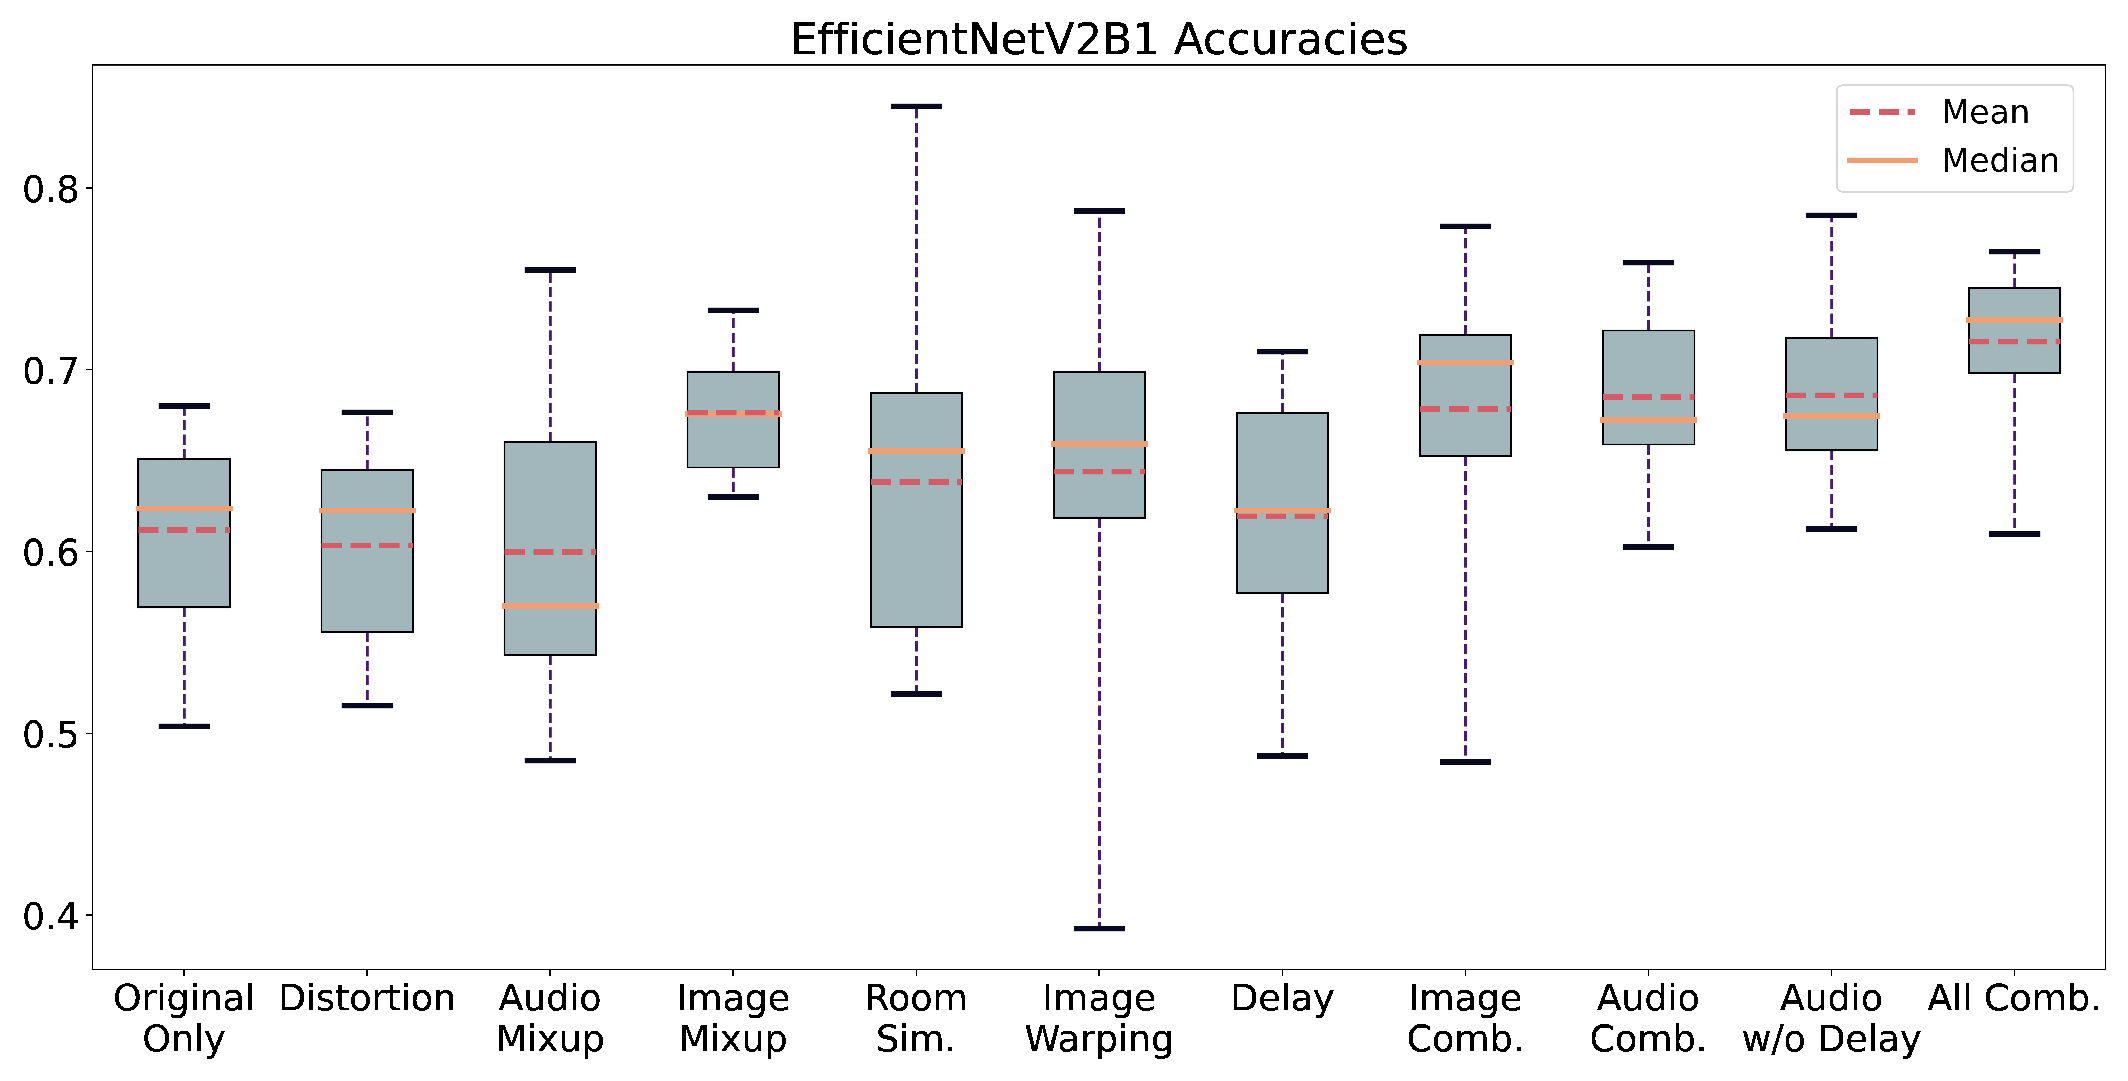

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10), dpi=224)
axs.axis('off')
axs.imshow(build_boxplot(acc, names=names,
           label='EfficientNetV2B1 Accuracies'), interpolation='nearest')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:341: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "wrap" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(


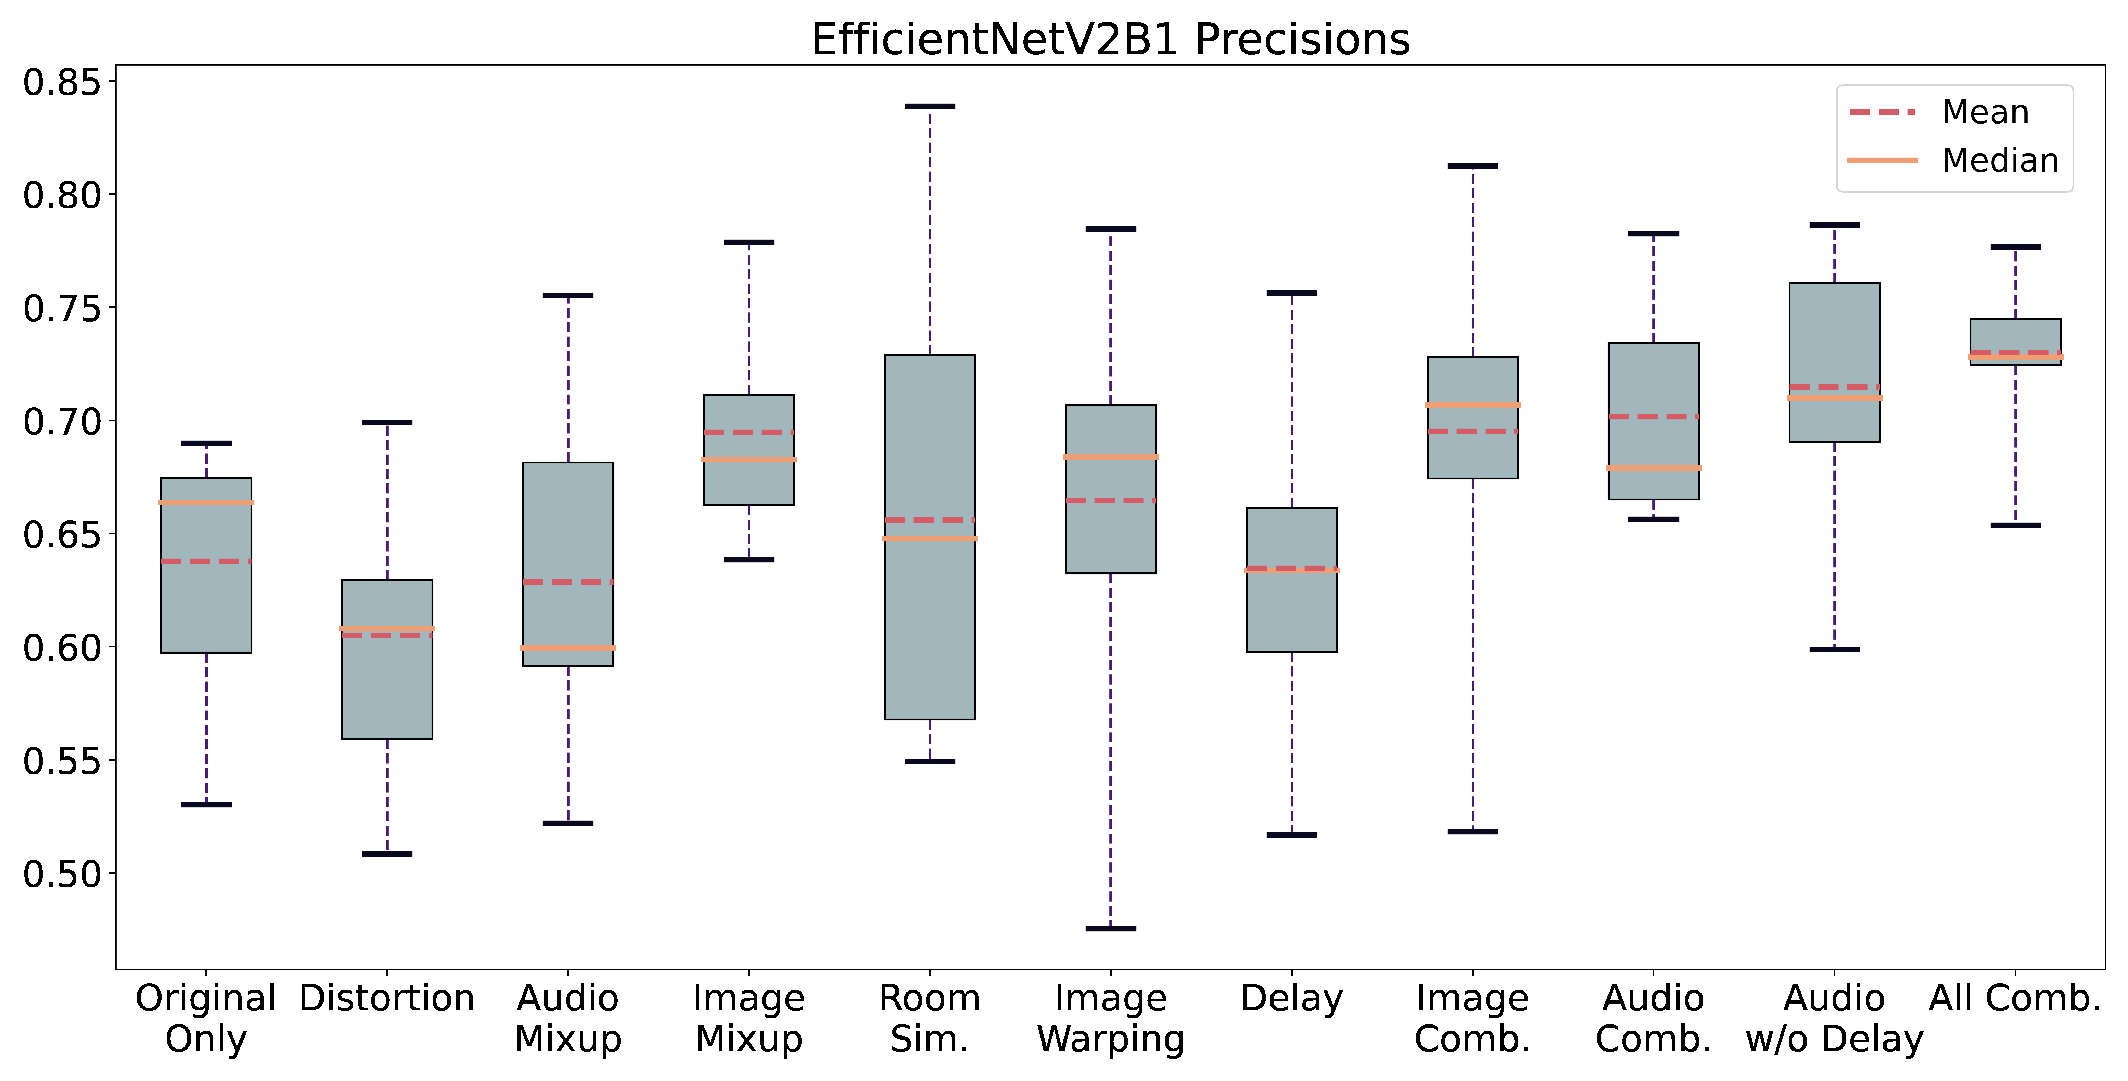

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10), dpi=224)
axs.axis('off')
axs.imshow(build_boxplot(get_prf1_table(df, names=names, metric='precision'),
           names=names, label='EfficientNetV2B1 Precisions'), interpolation='nearest')
plt.show()

/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:341: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "wrap" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(


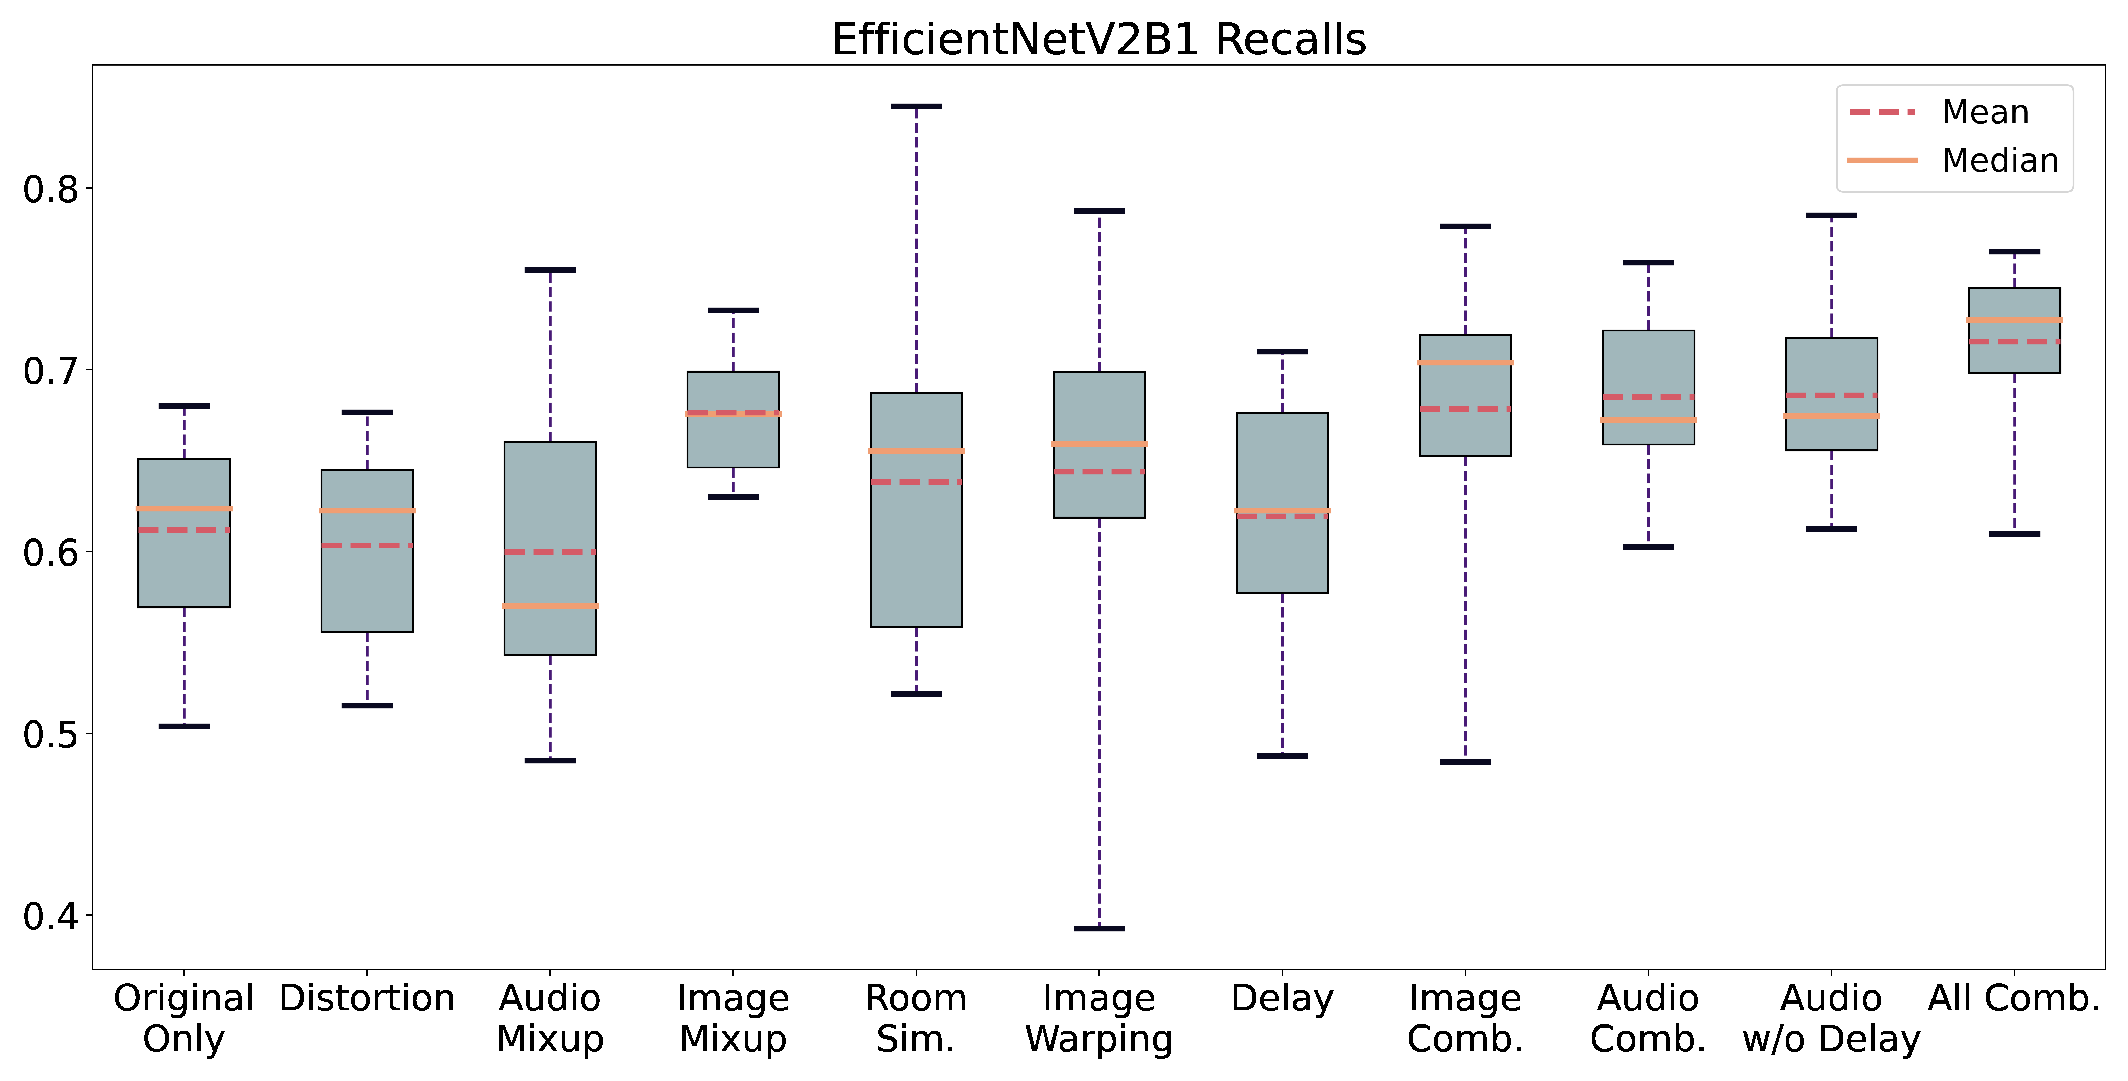

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10), dpi=224)
axs.axis('off')
axs.imshow(build_boxplot(get_prf1_table(df, names=names, metric='recall'),
           names=names, label='EfficientNetV2B1 Recalls'), interpolation='nearest')
plt.show()

/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:341: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "wrap" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(


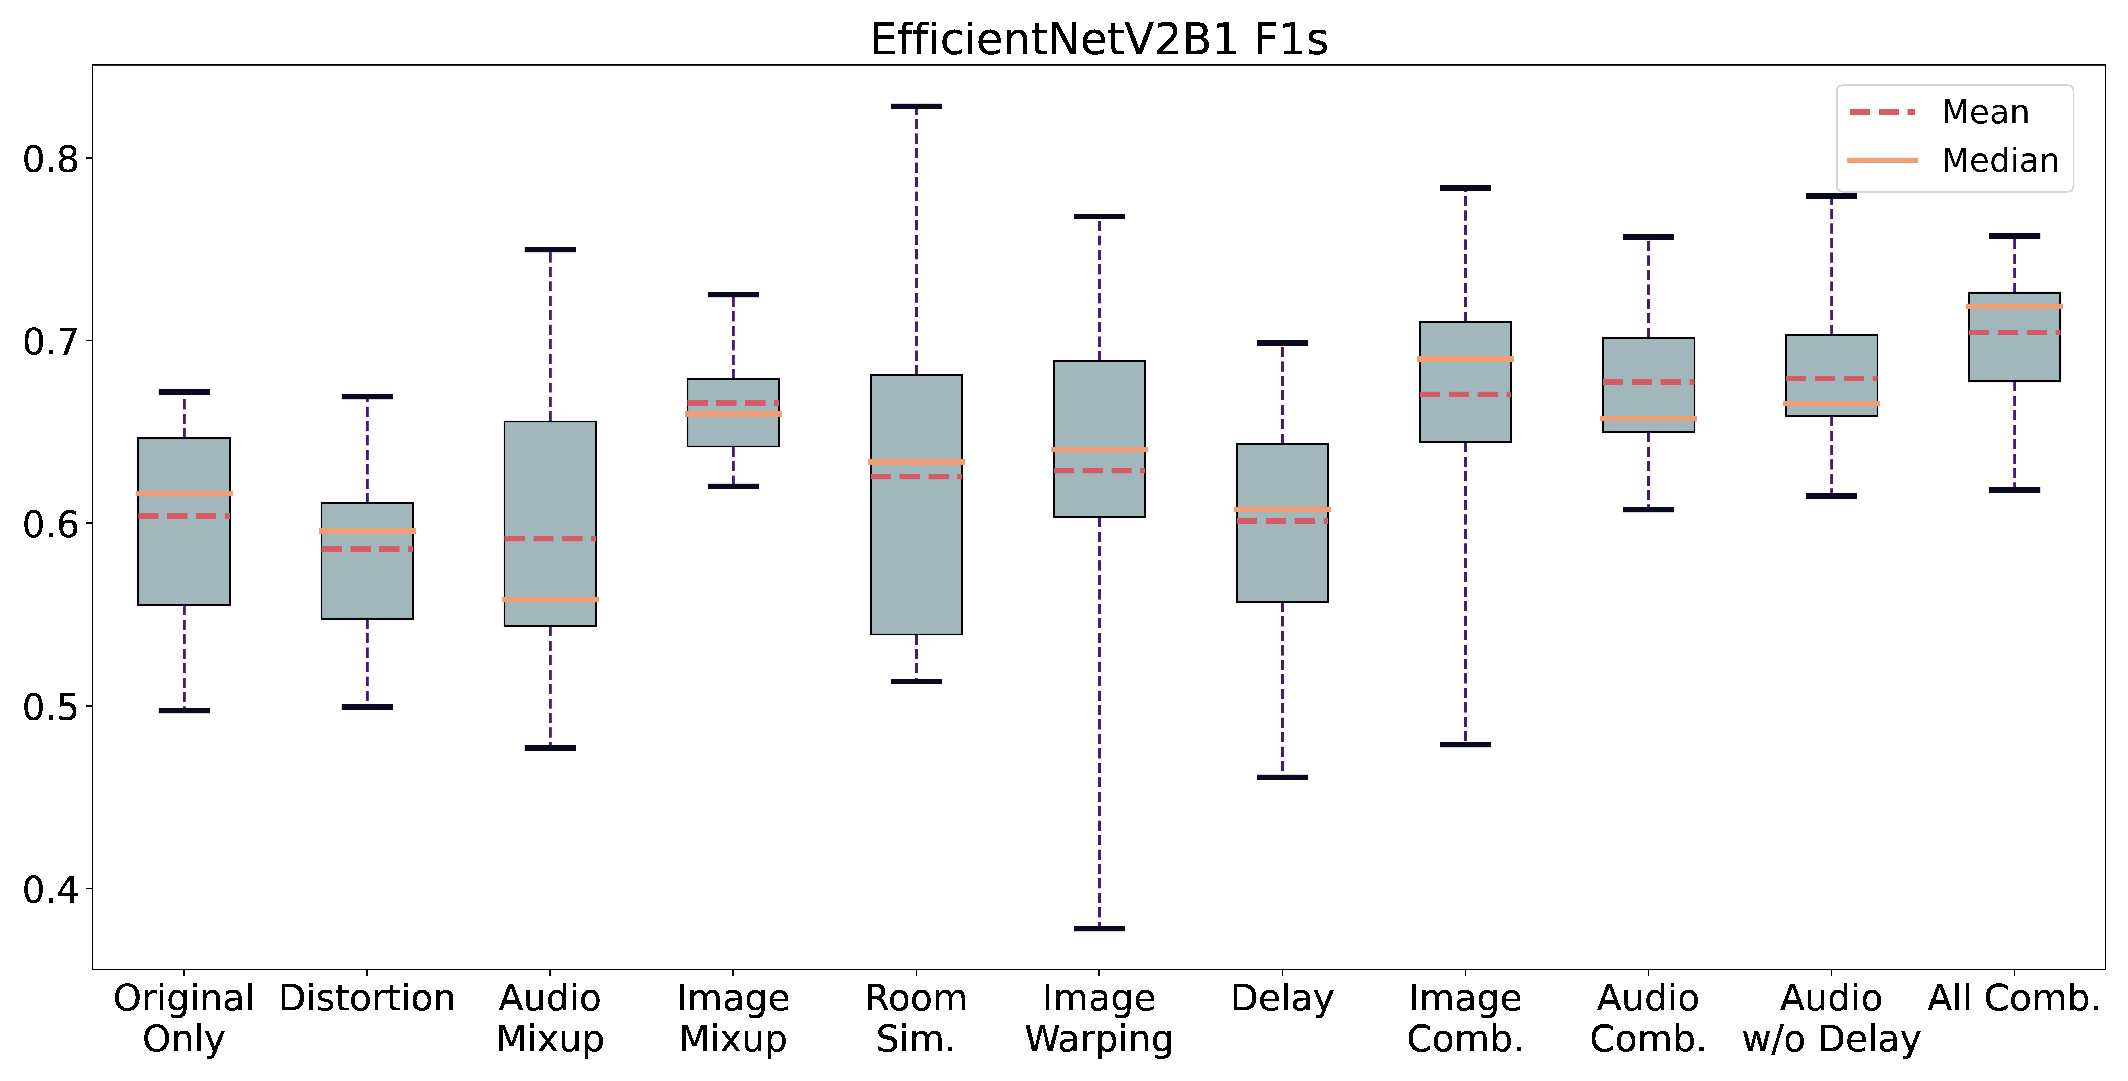

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10), dpi=224)
axs.axis('off')
axs.imshow(build_boxplot(get_prf1_table(df, names=names, metric='f1'),
           names=names, label='EfficientNetV2B1 F1s'), interpolation='nearest')
plt.show()

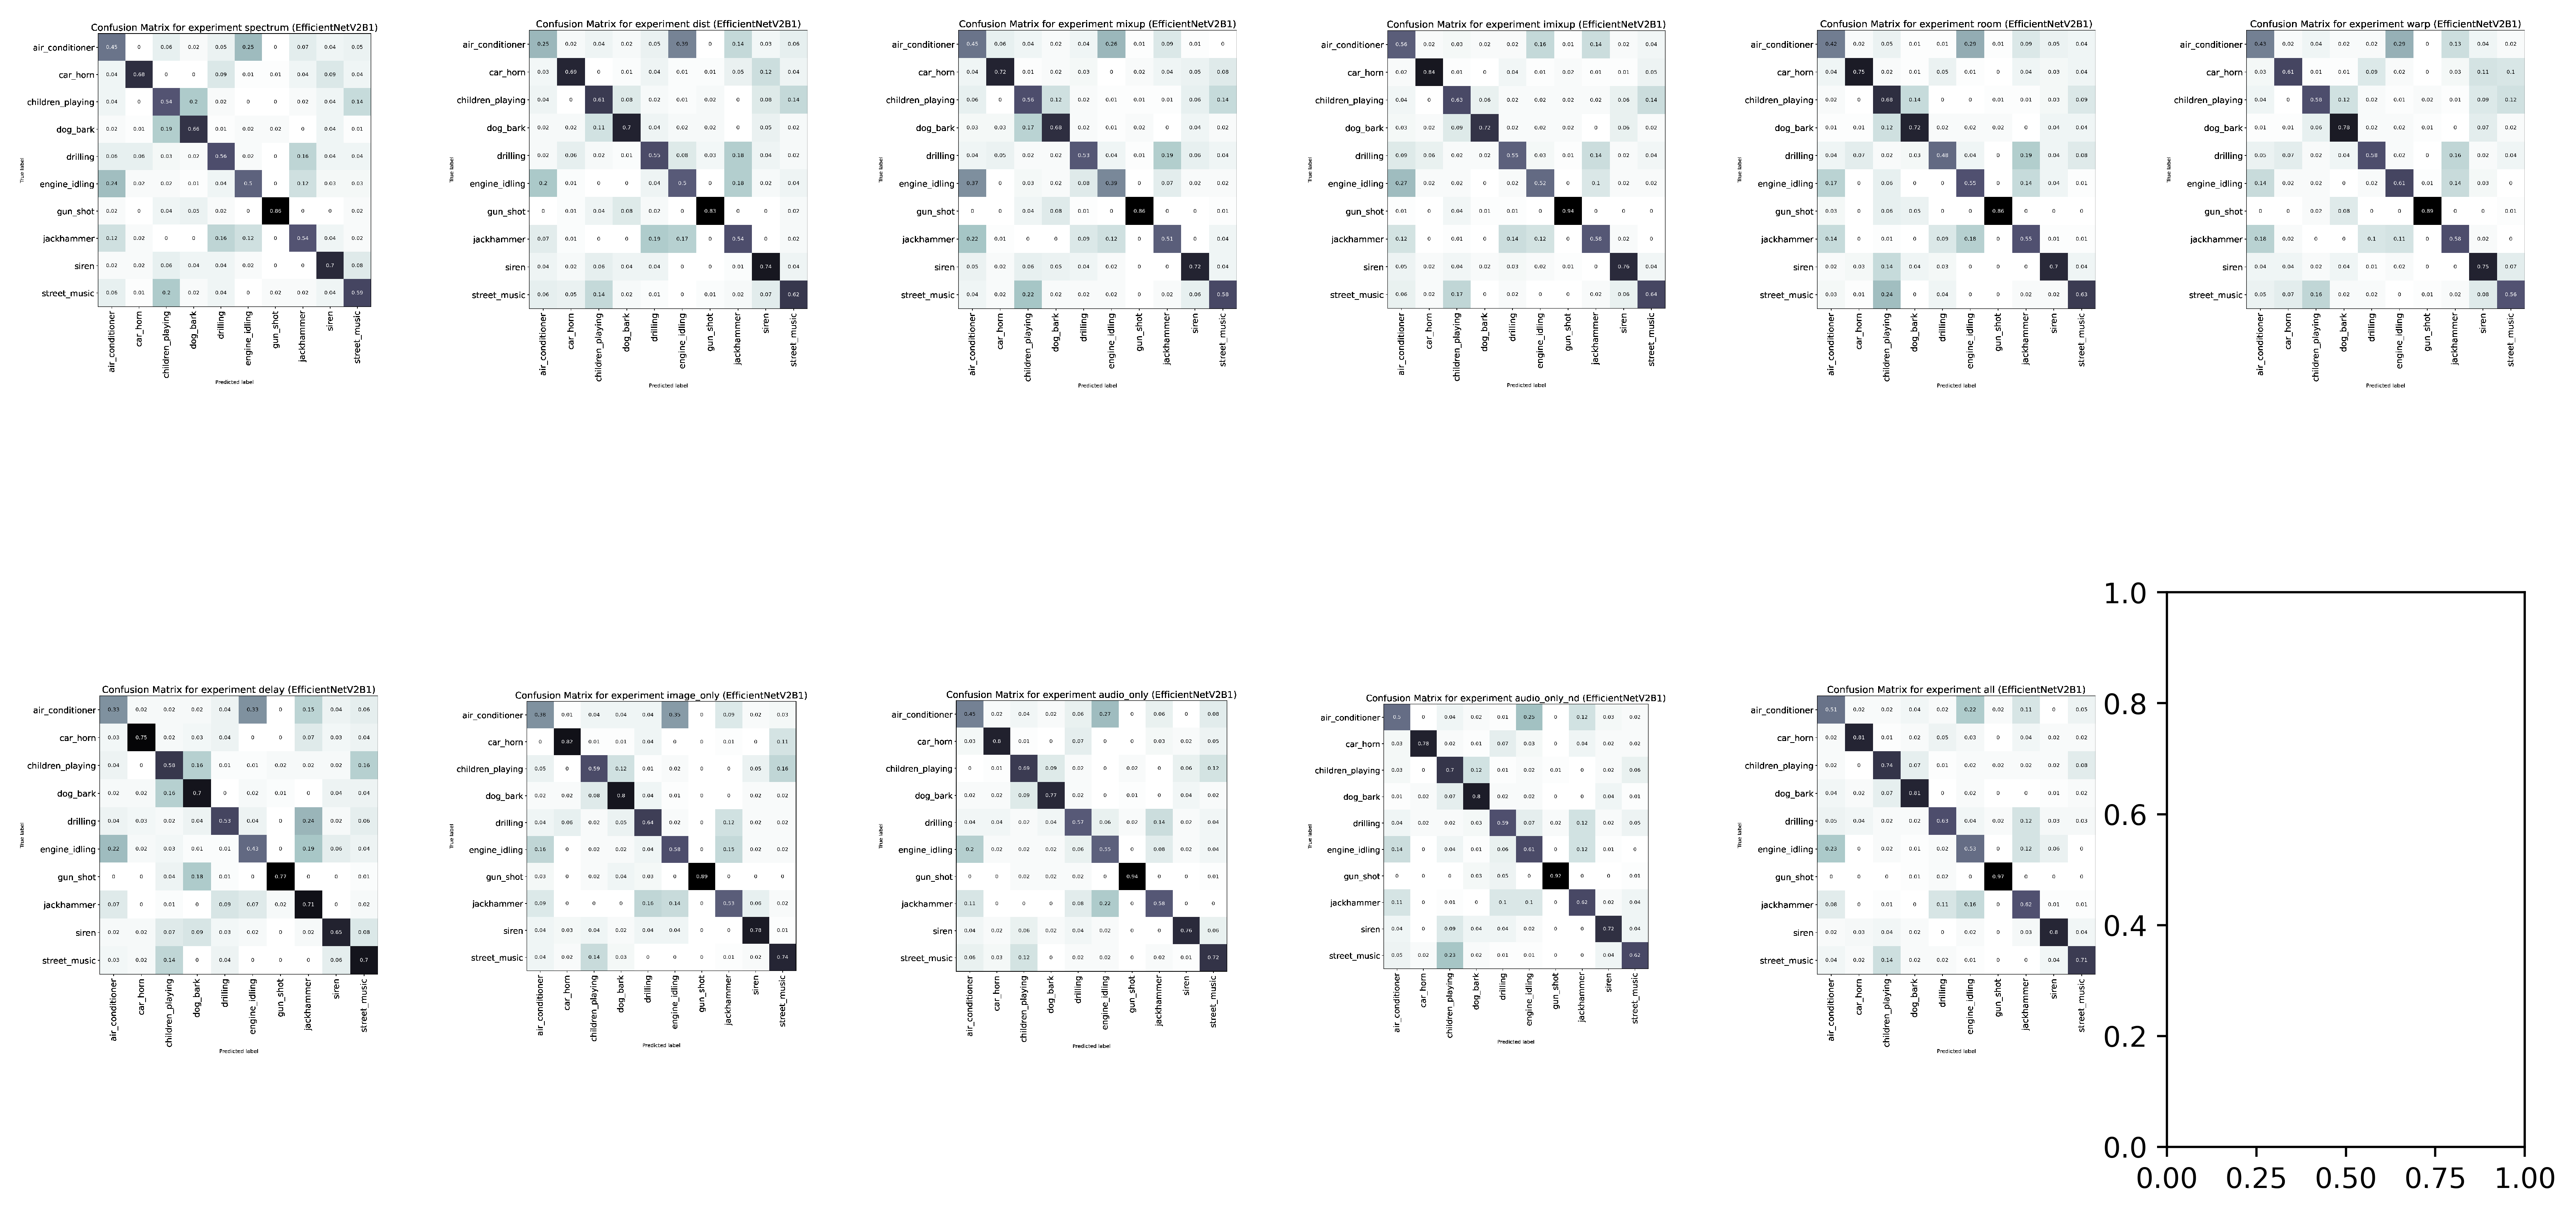

In [8]:
fig, axs = plt.subplots(2, 6, figsize=(16, 8), dpi=512)
r = 0
c = 0
for i, name in enumerate(names):
    r = i // 6
    c = i % 6
    axs[r][c].axis('off')
    axs[r][c].imshow(build_confusion_matrix(
        df, name, prefix="EfficientNetV2B1"), interpolation='nearest')
plt.show()

# EfficientNet V2B2 Results


In [9]:
df = pd.read_pickle('../EfNetV2B2Res.pkl')
df.head()  # How the data looks like

,slice_file_name,fold,class,source,dist,mixup,imixup,room,spectrum,warp,delay,all,image_only,audio_only,audio_only_nd
0,57320-0-0-39.wav,1,air_conditioner,o,children_playing,air_conditioner,air_conditioner,air_conditioner,children_playing,children_playing,dog_bark,air_conditioner,dog_bark,air_conditioner,air_conditioner
1,134717-0-0-6.wav,1,air_conditioner,o,street_music,air_conditioner,air_conditioner,air_conditioner,air_conditioner,engine_idling,air_conditioner,engine_idling,air_conditioner,street_music,air_conditioner
2,57320-0-0-31.wav,1,air_conditioner,o,dog_bark,air_conditioner,air_conditioner,dog_bark,dog_bark,dog_bark,dog_bark,air_conditioner,dog_bark,air_conditioner,dog_bark
3,134717-0-0-15.wav,1,air_conditioner,o,engine_idling,air_conditioner,air_conditioner,air_conditioner,air_conditioner,air_conditioner,engine_idling,engine_idling,siren,street_music,air_conditioner
4,177621-0-0-27.wav,1,air_conditioner,o,engine_idling,engine_idling,jackhammer,air_conditioner,engine_idling,jackhammer,jackhammer,air_conditioner,engine_idling,engine_idling,air_conditioner


In [10]:
acc = get_accuracy_table(df, names=names)
summarize_table_to_latex(acc, "EfficientNetV2B2")
acc

/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:361: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t = t.append(mean, ignore_index=True)
/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:362: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t = t.append(median, ignore_index=True)
/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:363: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t = t.append(std, ignore_index=True)
/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:365: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. I

,spectrum,dist,mixup,imixup,room,warp,delay,image_only,audio_only,audio_only_nd,all
1,0.610000,0.650000,0.570000,0.720000,0.845000,0.740000,0.685000,0.735000,0.675000,0.770000,0.725000
2,0.553333,0.616667,0.623333,0.676667,0.693333,0.671667,0.650000,0.643333,0.756667,0.688333,0.685000
3,0.680000,0.571667,0.570000,0.630000,0.521667,0.648333,0.710000,0.705000,0.670000,0.641667,0.730000
4,0.503930,0.515267,0.539332,0.635615,0.526176,0.392620,0.545695,0.484278,0.630668,0.574439,0.609759
5,0.670000,0.676667,0.755000,0.675000,0.693333,0.630000,0.610000,0.705000,0.711667,0.750000,0.730000
6,0.622308,0.537308,0.512500,0.662500,0.555000,0.615000,0.597308,0.627115,0.602500,0.715000,0.697500
7,0.555833,0.628333,0.485000,0.640833,0.569167,0.787500,0.487500,0.680000,0.662500,0.663333,0.700000
8,0.625000,0.630000,0.715000,0.702778,0.668889,0.670000,0.635000,0.723889,0.725000,0.735000,0.750000
9,0.645556,0.550556,0.554444,0.687778,0.647778,0.577222,0.570556,0.702778,0.657778,0.688889,0.765000
10,0.652778,0.657778,0.672778,0.732778,0.662778,0.707778,0.702778,0.778889,0.758889,0.682778,0.762778


/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:341: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "wrap" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(


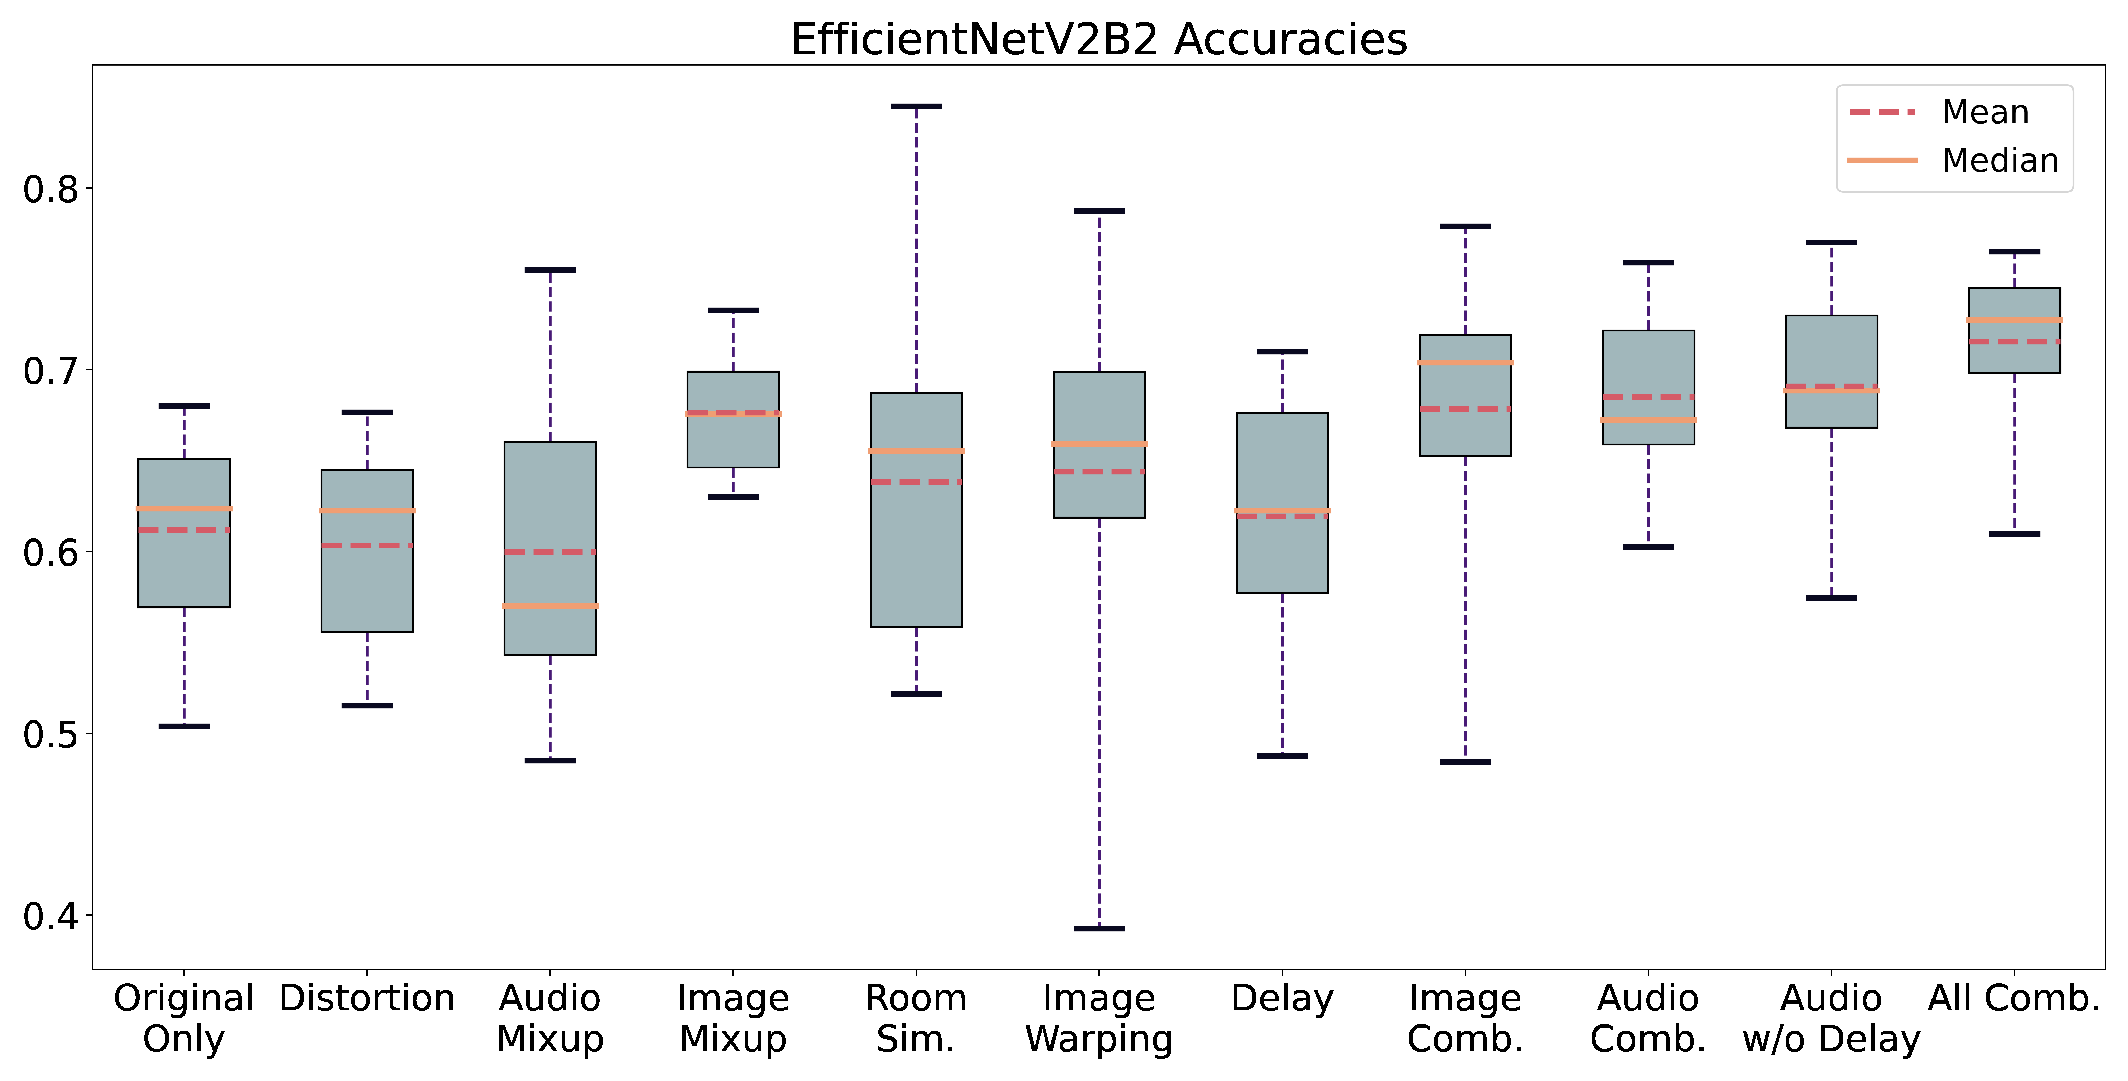

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10), dpi=224)
axs.axis('off')
axs.imshow(build_boxplot(acc, names=names,
           label='EfficientNetV2B2 Accuracies'), interpolation='nearest')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:341: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "wrap" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(


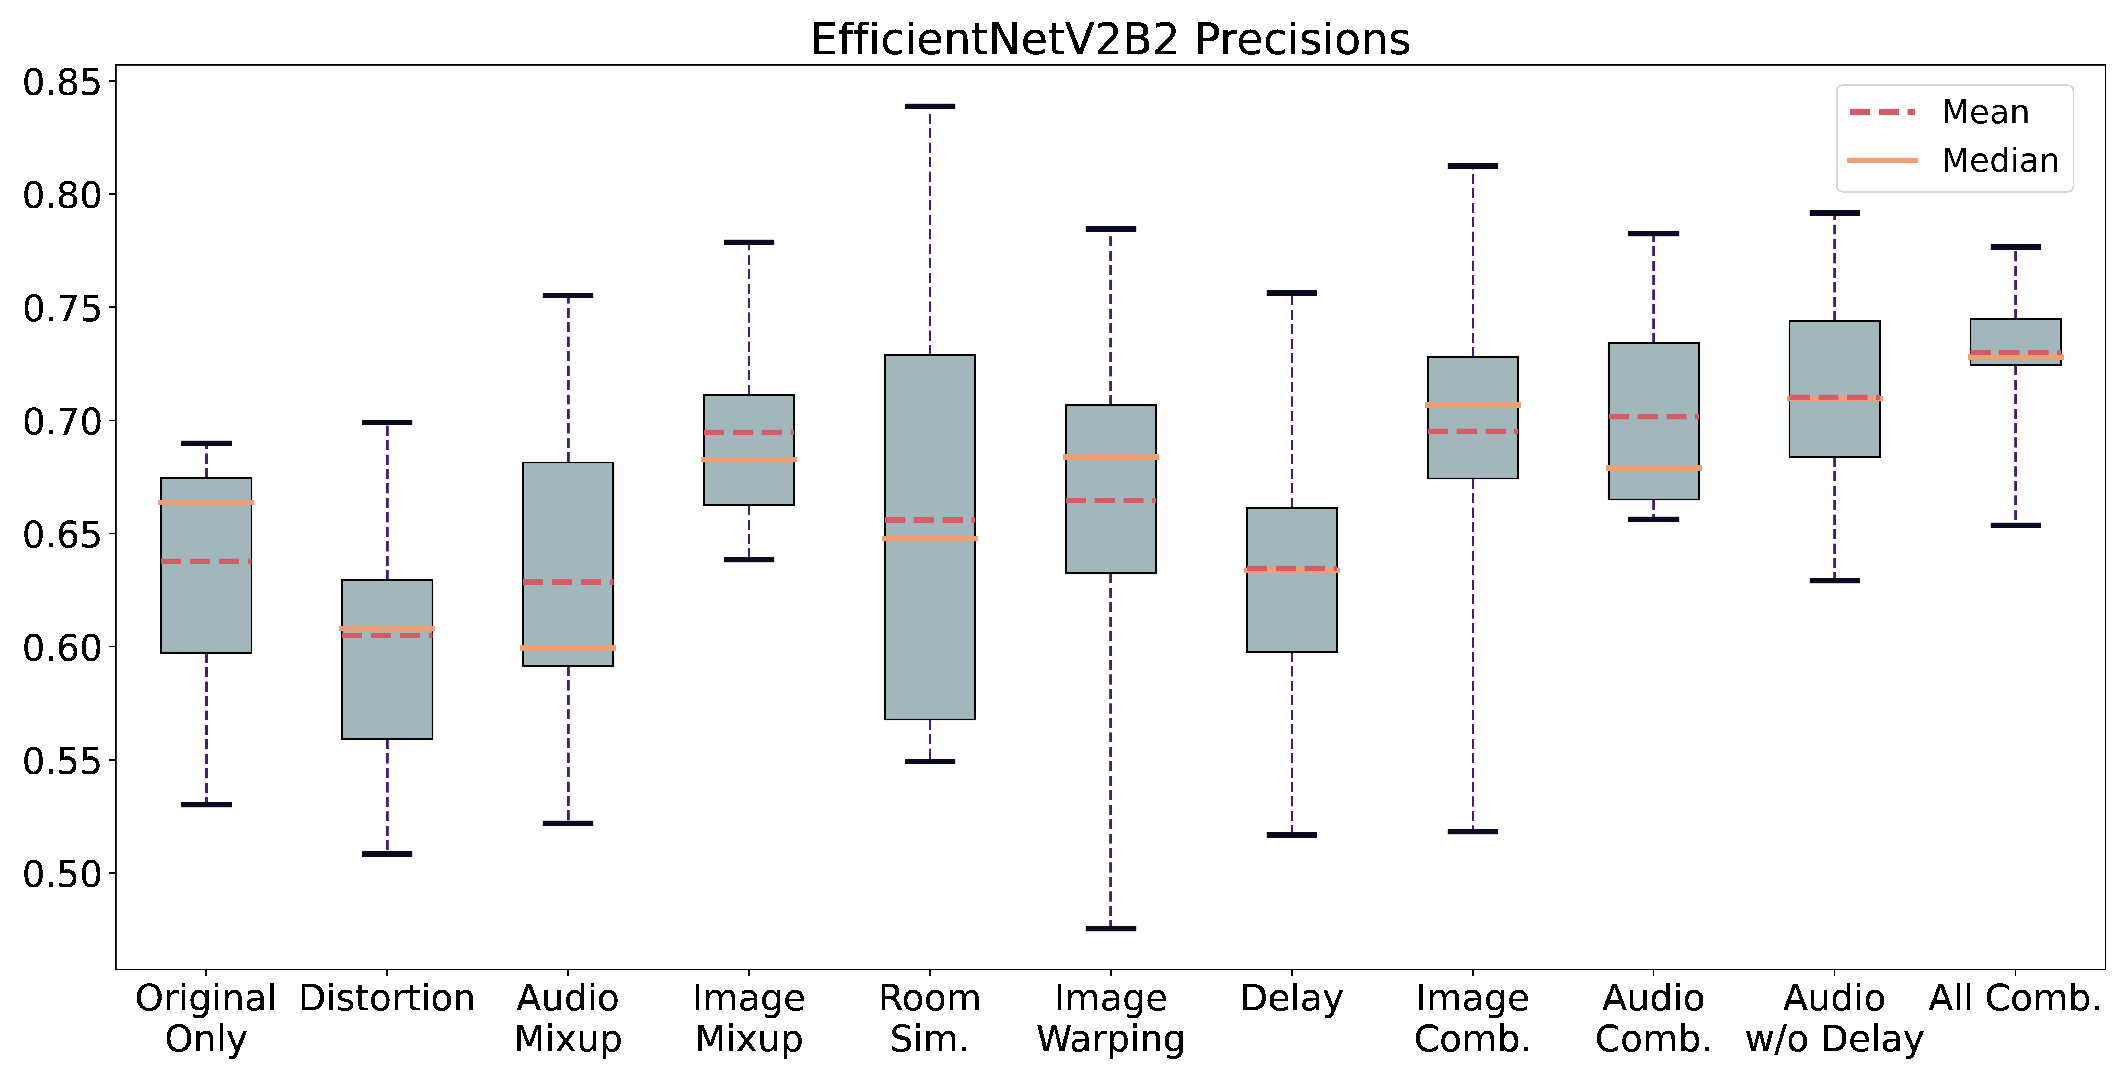

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10), dpi=224)
axs.axis('off')
axs.imshow(build_boxplot(get_prf1_table(df, names=names, metric='precision'),
           names=names, label='EfficientNetV2B2 Precisions'), interpolation='nearest')
plt.show()

/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:341: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "wrap" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(


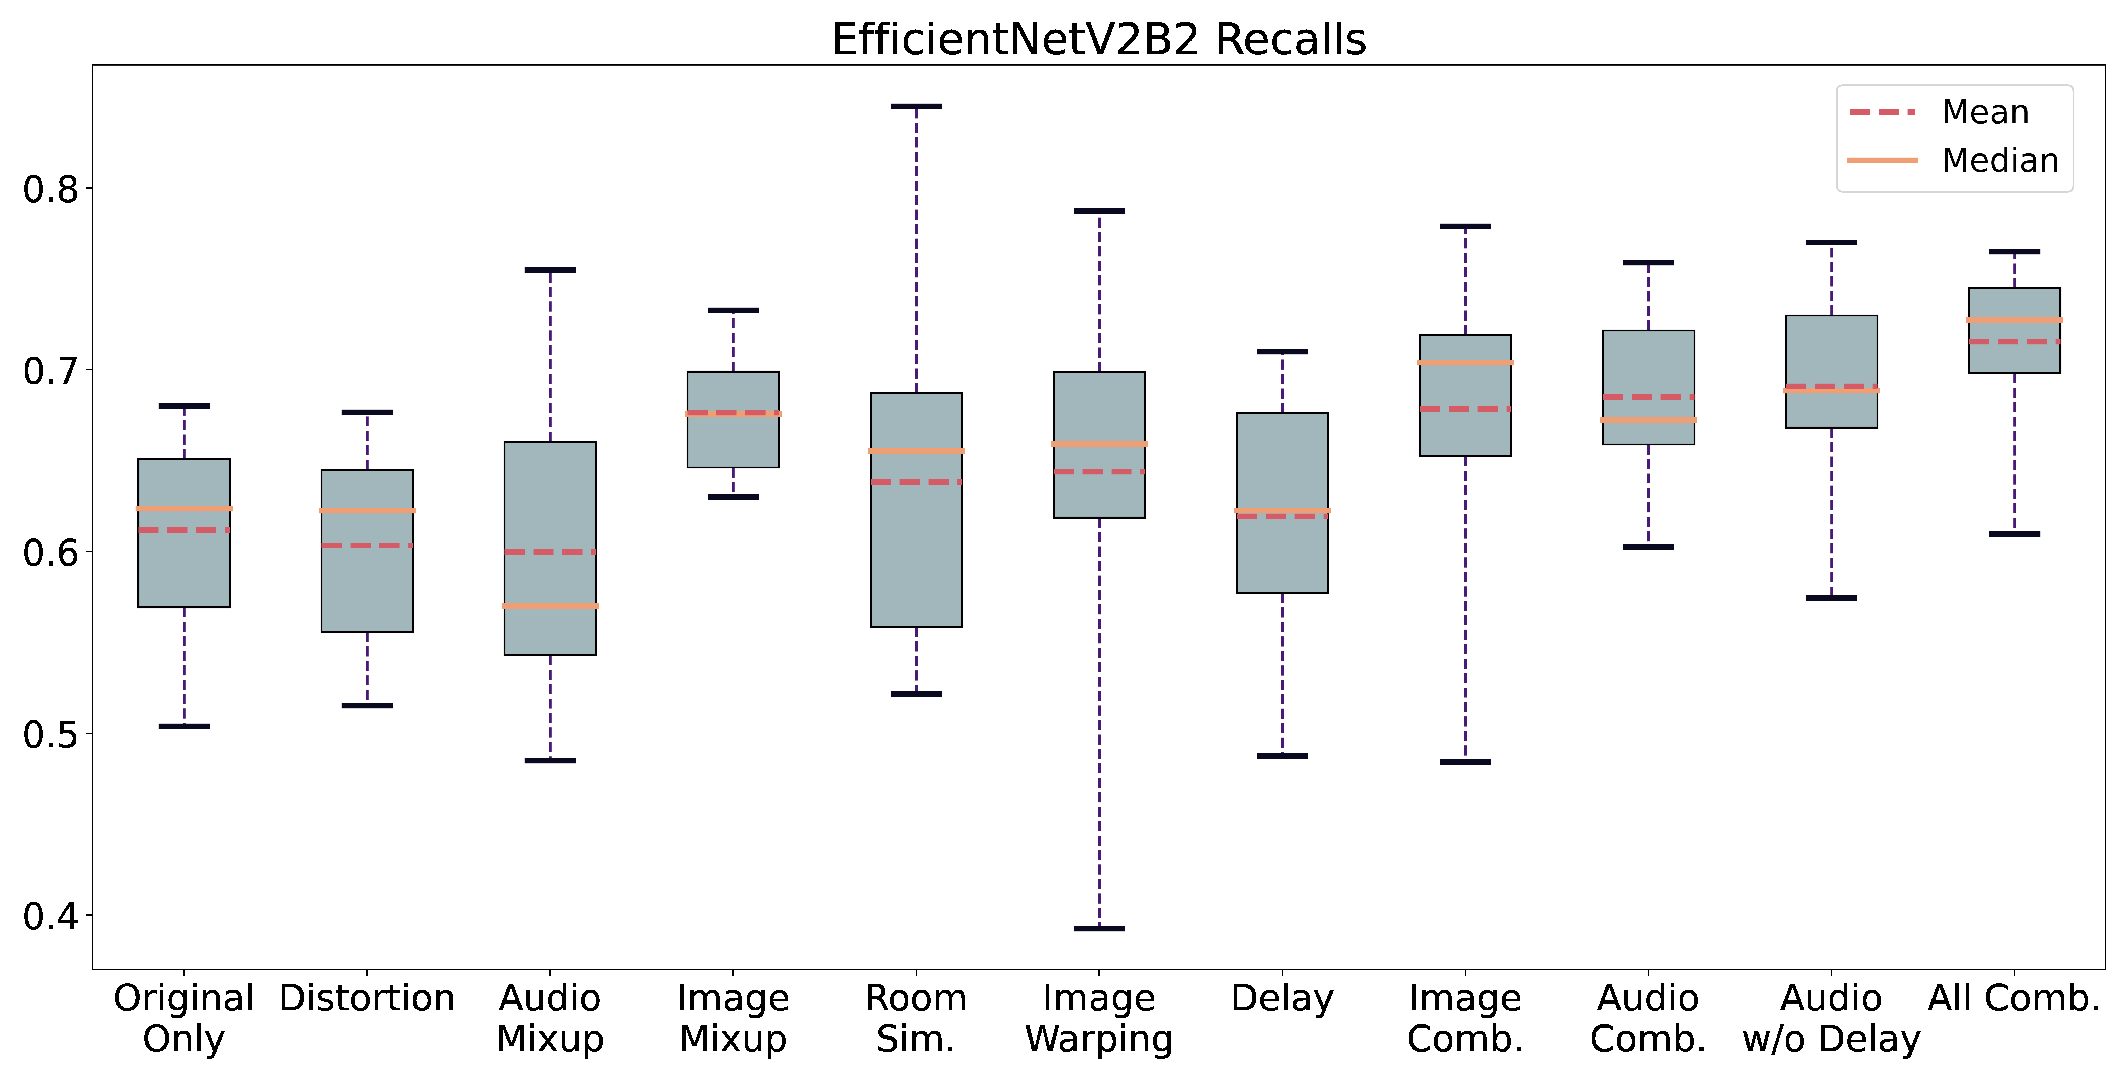

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10), dpi=224)
axs.axis('off')
axs.imshow(build_boxplot(get_prf1_table(df, names=names, metric='recall'),
           names=names, label='EfficientNetV2B2 Recalls'), interpolation='nearest')
plt.show()

/Users/ivanstankov/Documents/Study/thesis_code/src/py/helpers.py:341: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "wrap" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(


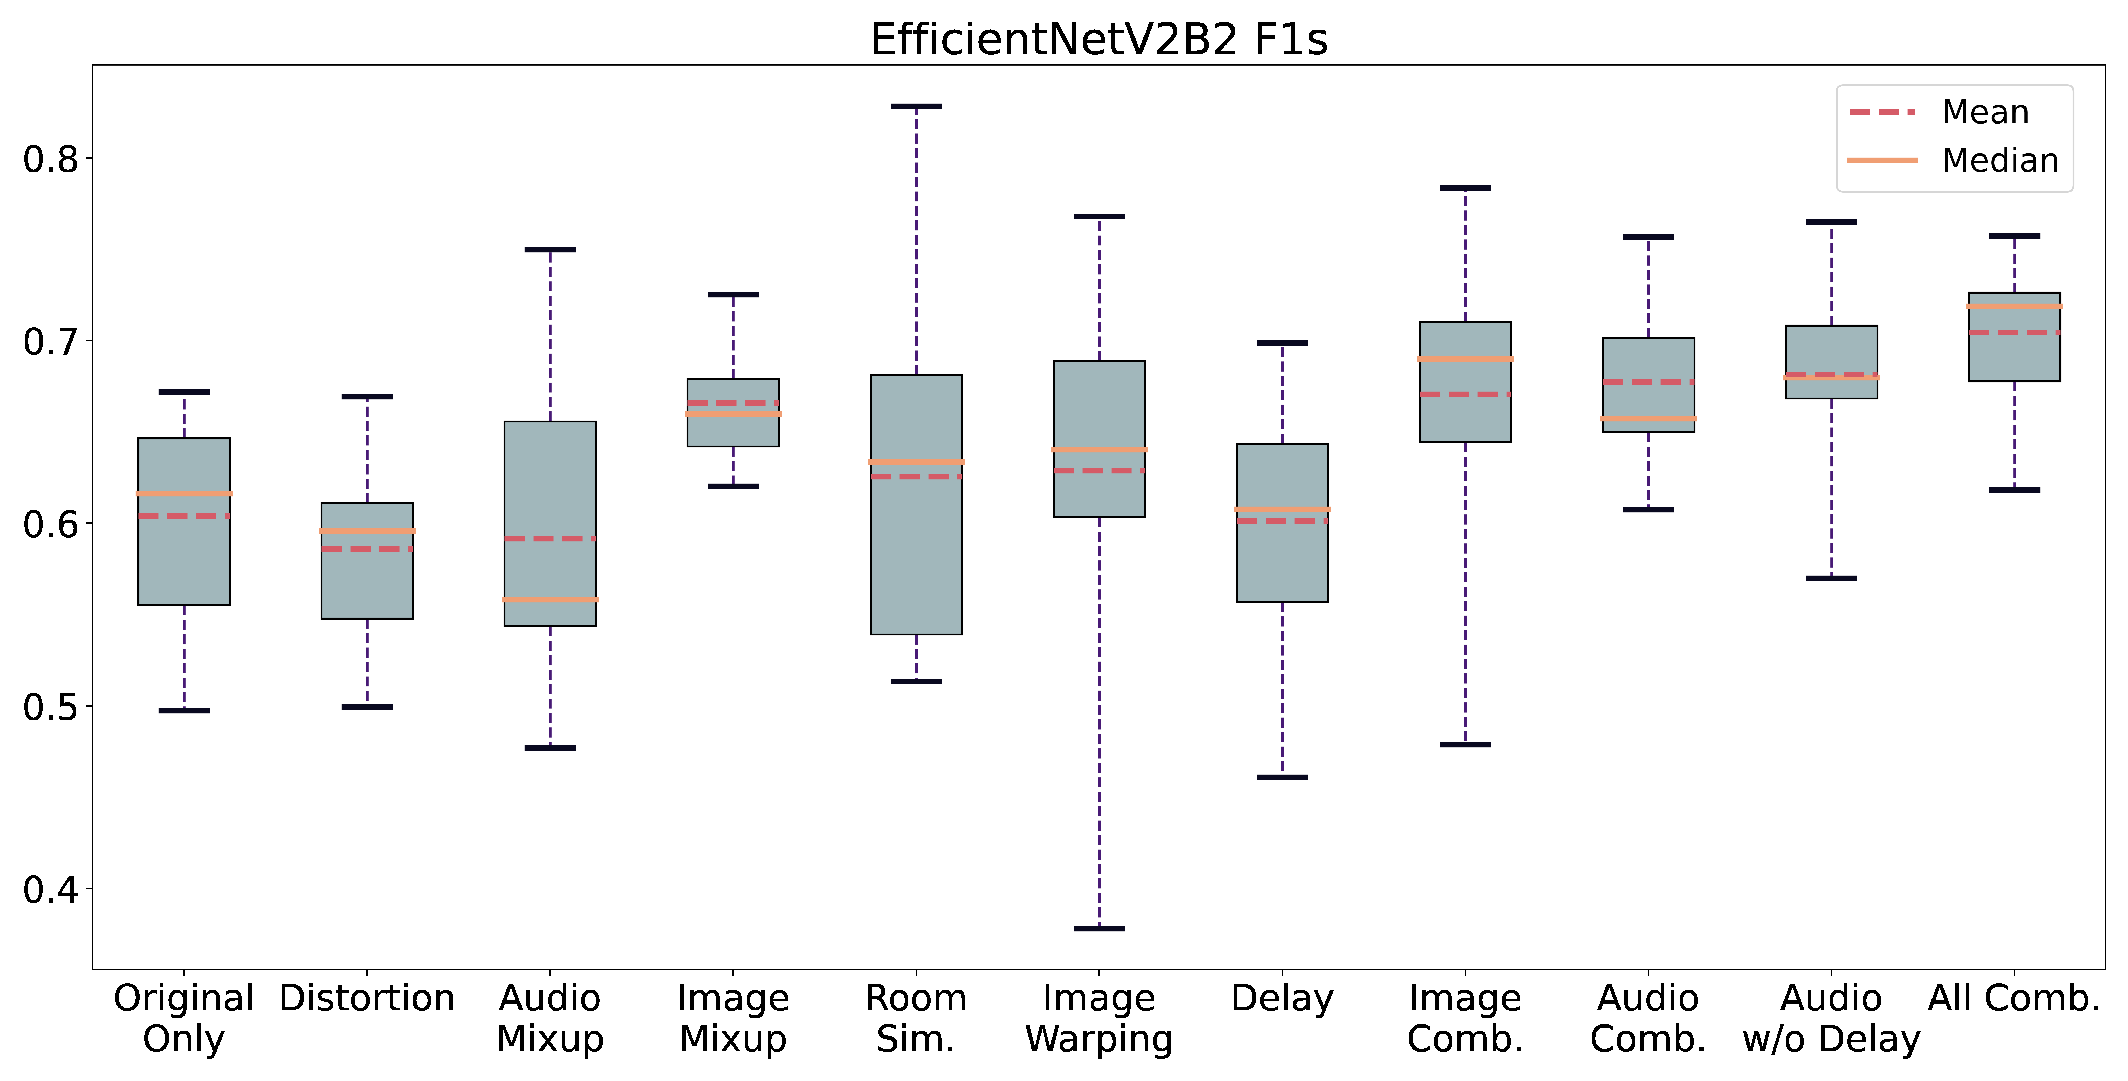

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10), dpi=224)
axs.axis('off')
axs.imshow(build_boxplot(get_prf1_table(df, names=names, metric='f1'),
           names=names, label='EfficientNetV2B2 F1s'), interpolation='nearest')
plt.show()

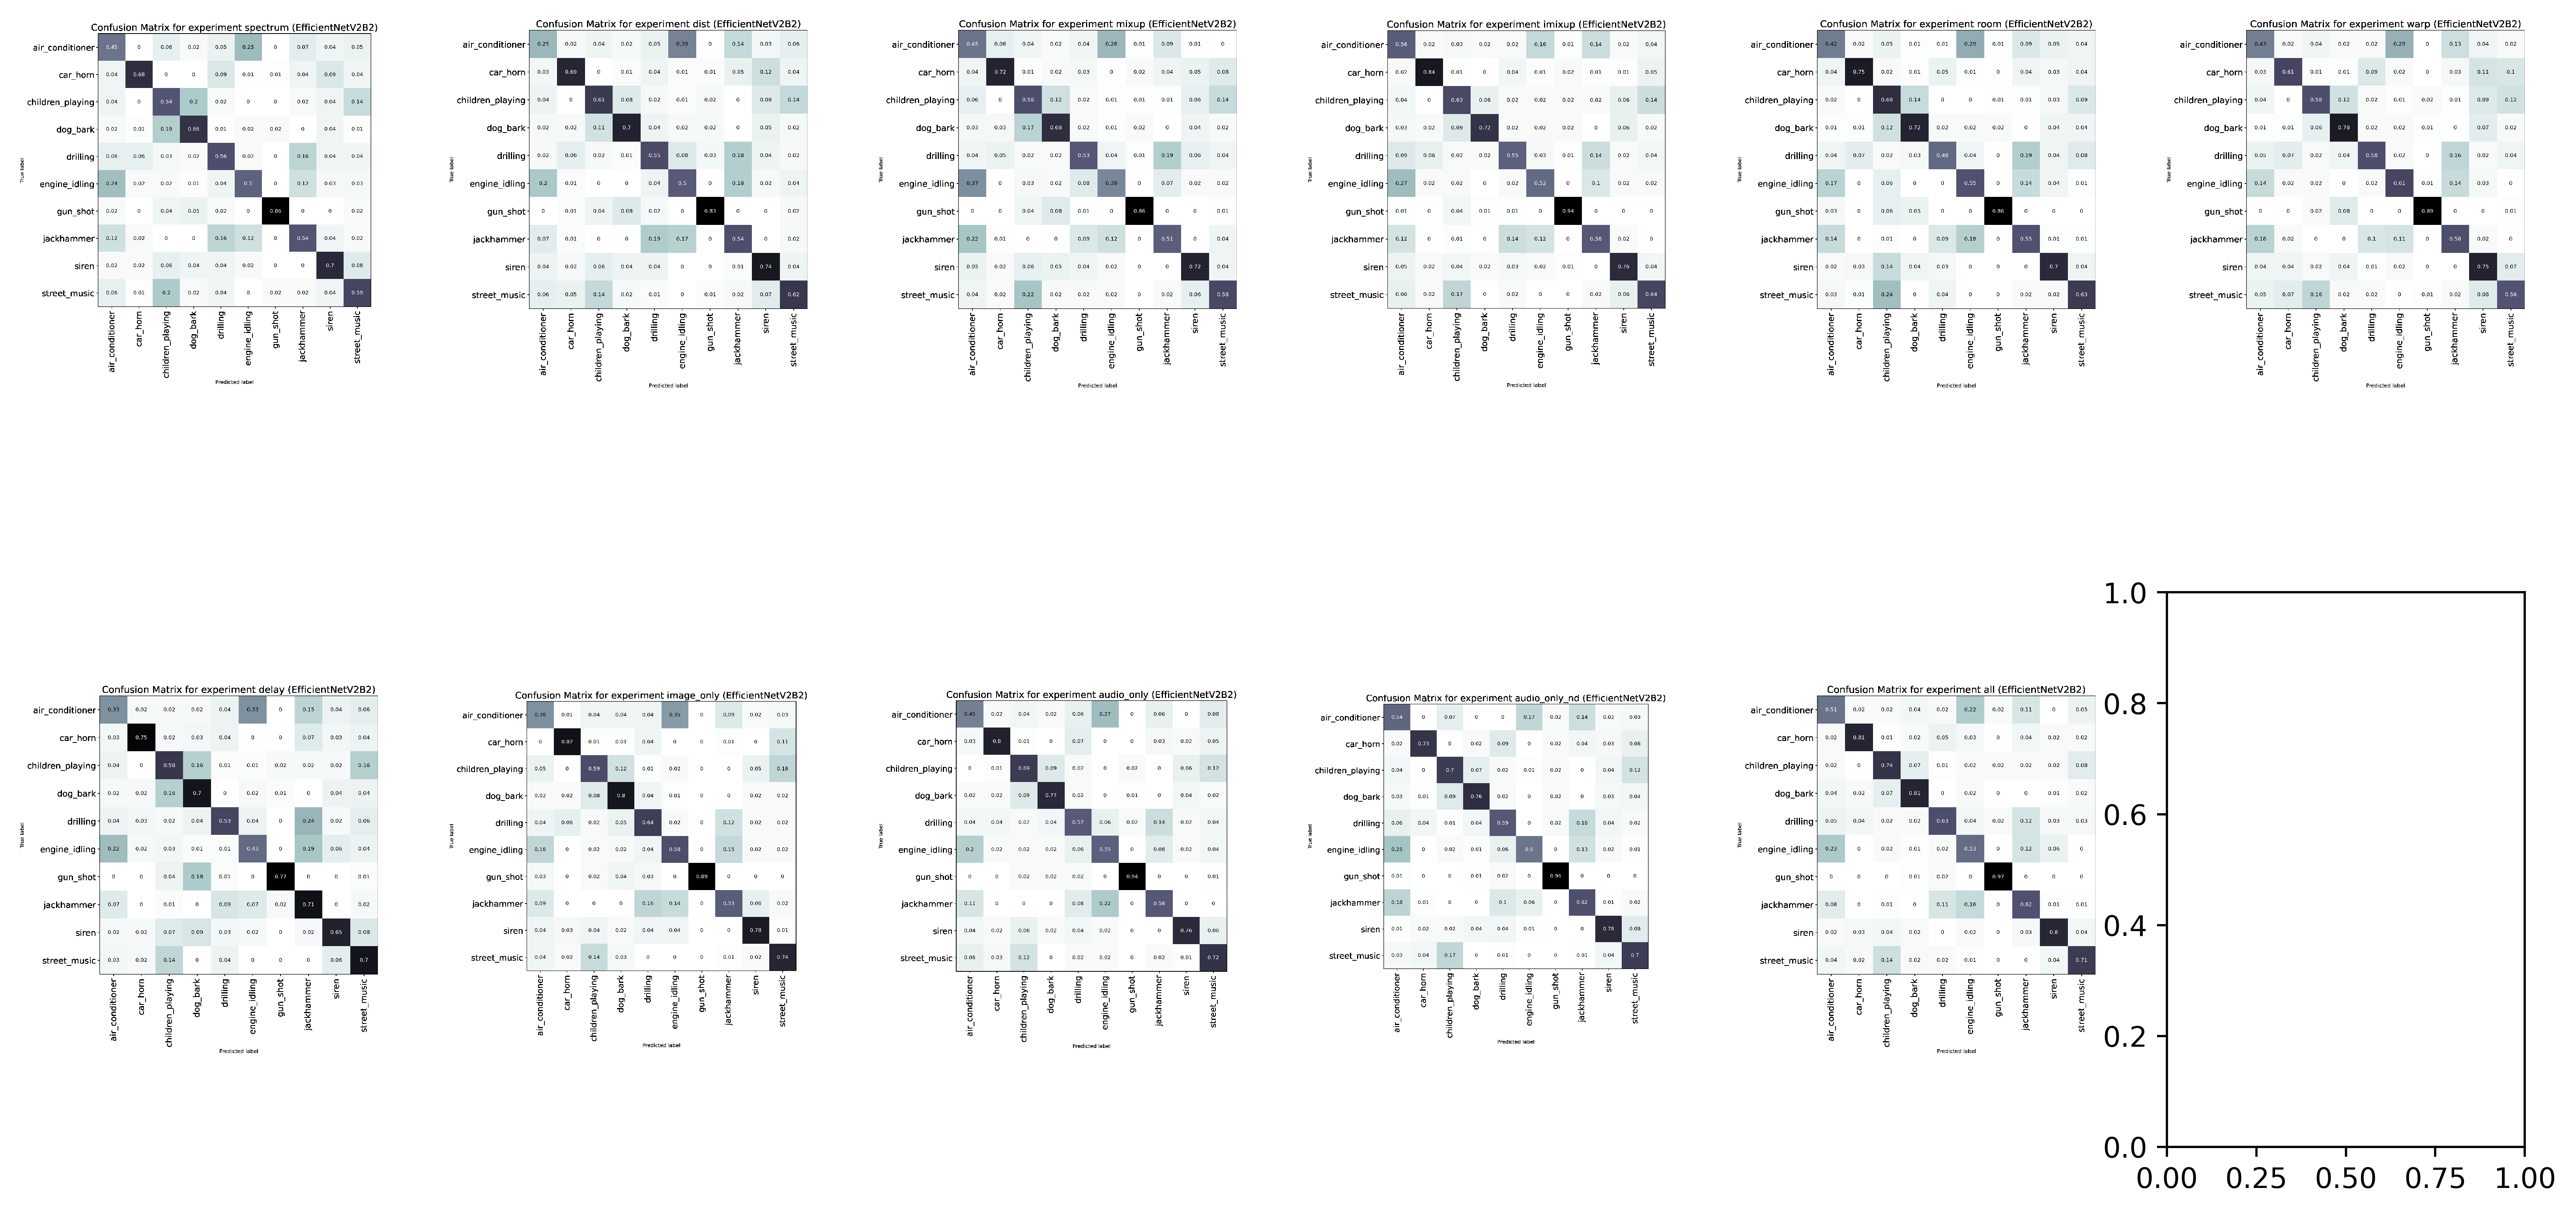

In [15]:
fig, axs = plt.subplots(2, 6, figsize=(16, 8), dpi=512)
r = 0
c = 0
for i, name in enumerate(names):
    r = i // 6
    c = i % 6
    axs[r][c].axis('off')
    axs[r][c].imshow(build_confusion_matrix(
        df, name, prefix="EfficientNetV2B2"), interpolation='nearest')
plt.show()

# Conclusion

As you can see, there is only a minor difference between individual augmentation techniques and raw ones. This can be caused by multiple reasons:
1. Model of selection is capable enough to learn on small portion of unedited data but is uncapable of extracting useful insight from its augmented clones;
2. Augmentation techniques are providing effects too similar for them to be significantly different;
3. The dataset itself is too small to create an impact

All of these can be argued. For example, first argument is not holding true, because total accuracy is not that high (perhaps due to train and test data being too different). 2. Can be argued simply by visual isnight that one can obtain. They are considerably different. 3. There was a separate run on bigger portion of the data and results were almost the same.

Nonetheless, there is a clear benefit of employing such augmentation techniques:
1. While some augmentation techniques might have a negative impact, in every case there is a benefit, when certain call has to be targeted.
2. Mixup, for example, is improving results for almost every class
3. Finally, combination of various augmentation techniques is highly beneficial and provides much greater improvement in prediction quality, compared to addition of any single augmentation technique.
4. Augmentation techniques presented in this work can too, boost the quality of a model. Further study might elaborate on benefits of, for example, random parameter variation of augmentation techniques or employments of such in specific cases.
5. Out of all newly proposed techniques, Delay appears to be the least beneficial